**NTUST course: Computer Vision and Applications (CI5336701, 2022 Spring)**

Description:

1. Write a program for determining the camera position from ONE given image and a known
structure. You may need to calculate the intrinsic and extrinsic parameters of the camera. No
lens distortion on this image. (choose your tools, ex. C++/C, openCV, Matlab).
2. In this image, there is one cube with 50 mm in length, width and height. The world coordinate
is on a corner and its x, y and z axes are on the edges as shown in the figure.

3. Please manually select 3 squares (rectangles, or known but non-degenerated shapes), then
determine their homography from them (real-dimension to image domain). Based on Zhang’s
method (or IAC), please calculate the intrinsic parameter of the camera.
4. In this assignment, there is NO need to read this image or detect features in your program. You
can use an image editor tool (ex. photoshop, XnView) for picking out the pixel coordinate
then copy text into your program.
5. Deliverable: There are three types of data you should provide:
1) Source code in C++/C or Matlab (or similar program with simple comment), being able to
print out intrinsic parameter.
2) (Optional) Execution file (.exe), if appliable.
3) One page note for showing the points you select in this image.
Please zip all your files, then upload to moodle2 (https://moodle2.ntust.edu.tw/) by due date.
6. Score evaluation:
1. 100% for determining K correctly.
2. Extra 25% bonus for calculating the camera position (relative to world coordinate).
Hint: Camera Position and Ground Truth (for your reference):

Page 2 of 2

The following data are not used in your homework#4. These are ONLY for verifying your result. Please
do NOT use any of these data in your program.
K matrix
892.613403 0.000000 518.500000
0.000000 892.613403 349.000000
0.000000 0.000000 1.000000
RT matrix
-0.346738 0.936377 -0.054507 -15.420745
0.447104 0.113917 -0.887199 4.205203
-0.824543 -0.331996 -0.458157 142.994766

# Ref Answer: 
K matrix  
892.613403, 0.000000, 518.500000  
0.000000, 892.613403, 349.000000  
0.000000, 0.000000, 1.000000  

RT matrix  
-0.346738 0.936377 -0.054507 -15.420745  
0.447104 0.113917 -0.887199 4.205203  
-0.824543 -0.331996 -0.458157 142.994766  

# 讀取來源圖檔集

Mounted at /content/drive


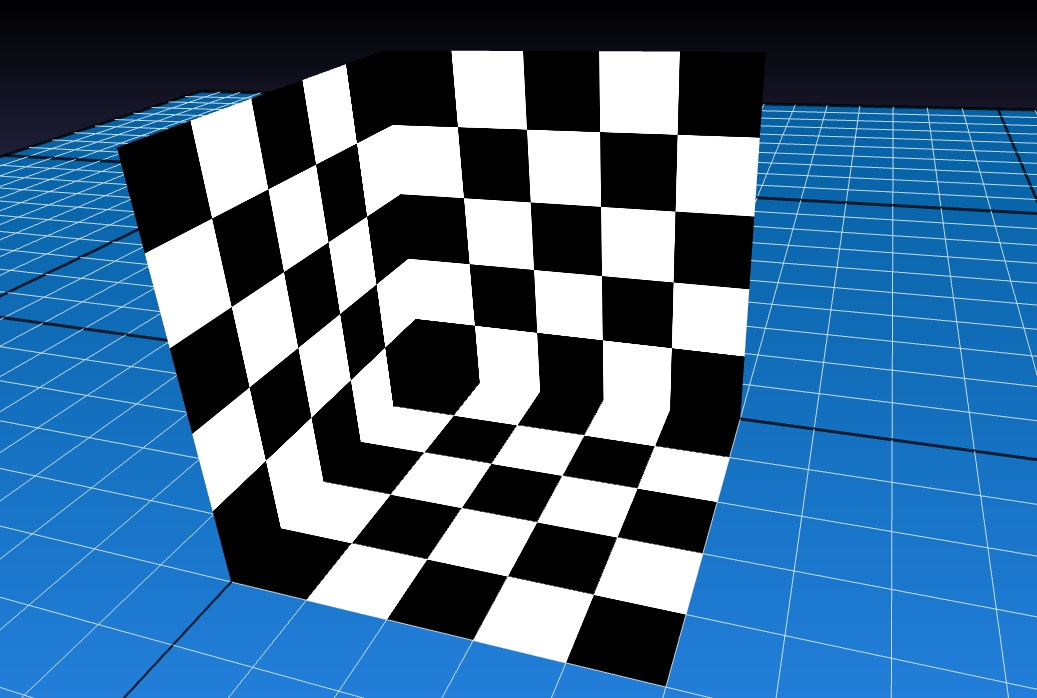

In [1]:
from google.colab.patches import cv2_imshow
import numpy as np
import cv2
from google.colab import drive
drive.mount('/content/drive')
Hw4_Image_Ori_Path = '/content/drive/MyDrive/Course/11002/Computer Vision/HW4/toCalibrated.jpg'
Hw4_Image_Result_Path = "/content/drive/MyDrive/Course/11002/Computer Vision/HW4/M11015Q03.jpg"
Ori_Imgae = cv2.imread(Hw4_Image_Ori_Path)
cv2_imshow(Ori_Imgae)

In [2]:
Shape_Coner = [[0.,0.],[0.,30.],[30.,30.],[30.,0.]] 
Coner_Left = [[213.,219.],[266.,460.],[385.,348.],[357.,145.]]
Coner_Right = [[459.,130.],[476.,326.],[673.,351.],[678.,137.]]
Coner_Bottom = [[455.,419.],[354.,544.],[595.,597.],[656.,448.]]

#Shape_Coner = [[0.,0.,1.],[0.,30.,1.],[30.,30.,1.],[30.,0.,1.]] 
#Coner_Left = [[213.,219.,1.],[266.,460.,1.],[285.,348.,1.],[357.,145.,1.]]
#Coner_Right = [[459.,130.,1.],[476.,326.,1.],[673.,351.,1.],[678.,137.,1.]]
#Coner_Bottom = [[455.,419.,1.],[354.,544.,1.],[595.,597.,1.],[656.,448.,1.]]

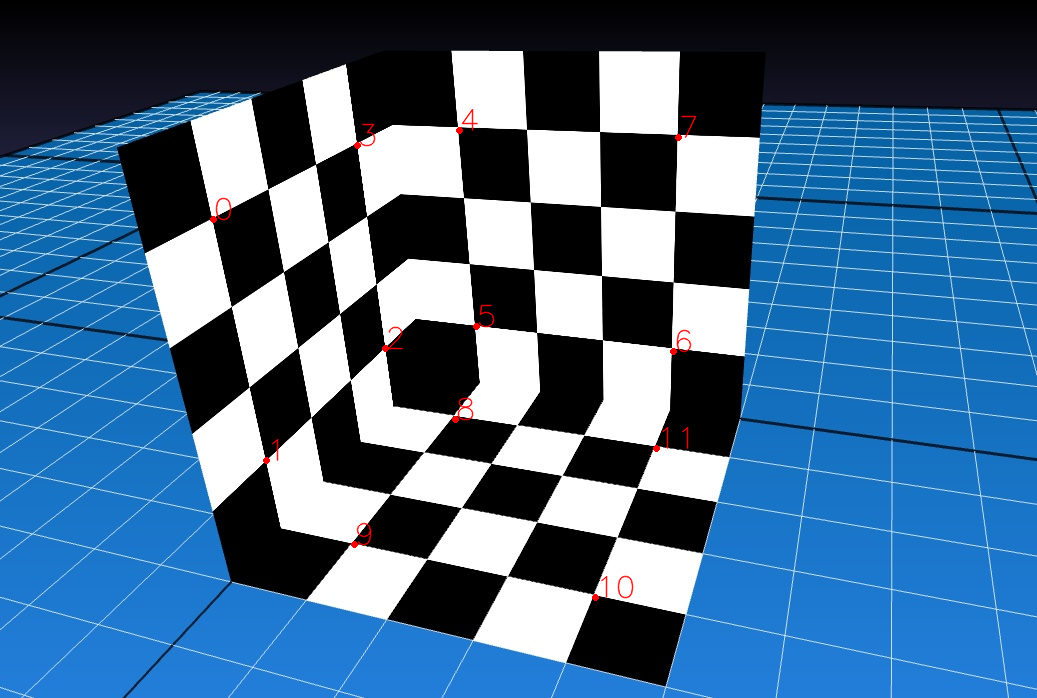

In [3]:
Coner_Left = [[213,219],[266,460],[385,348],[357,145]]
Coner_Right = [[459,130],[476,326],[673,351],[678,137]]
Coner_Bottom = [[455,419],[354,544],[595,597],[656,448]]
   
# Center coordinates 
  
# Radius of circle 
radius = 2
   
# Blue color in BGR 
color = (0, 0, 255) 
   
# Line thickness of 2 px 
thickness = 2
   
# Using cv2.circle() method 
# Draw a circle with blue line borders of thickness of 2 px 
#Circle_image = cv2.circle(Ori_Imgae, Coner_Left, radius, color, thickness) 
Circle_image = Ori_Imgae
index = 0
for point in Coner_Left:
    Circle_image = cv2.circle(Ori_Imgae, tuple(point), radius, color, thickness)
    cv2.putText(Circle_image, str(index), tuple(point), cv2.FONT_HERSHEY_SIMPLEX,1, color, 1, cv2.LINE_AA)
    index+=1

for point in Coner_Right:
    Circle_image = cv2.circle(Ori_Imgae, tuple(point), radius, color, thickness)
    cv2.putText(Circle_image, str(index), tuple(point), cv2.FONT_HERSHEY_SIMPLEX,1, color, 1, cv2.LINE_AA)
    index+=1

for point in Coner_Bottom:
    Circle_image = cv2.circle(Ori_Imgae, tuple(point), radius, color, thickness)
    cv2.putText(Circle_image, str(index), tuple(point), cv2.FONT_HERSHEY_SIMPLEX,1, color, 1, cv2.LINE_AA)
    index+=1

# Displaying the image  
cv2_imshow(Circle_image) 

In [4]:
def CalCv2Homography(x, xp):
    #透過 OpenCV 計算 Homography 矩陣數值
    #x' = H * X
    HomoMatrix, _ = cv2.findHomography(np.asarray(x), np.asarray(xp))
    return HomoMatrix

In [5]:
ha = CalCv2Homography(Shape_Coner,Coner_Left)
hap = ha.T[0:2]
#hap = ha[0:2]
ha,hap

(array([[ 7.99245961e+00,  3.06971873e+00,  2.13000000e+02],
        [-1.17000940e+00,  1.02867316e+01,  2.19000000e+02],
        [ 8.94246388e-03,  4.89869197e-03,  1.00000000e+00]]),
 array([[ 7.99245961e+00, -1.17000940e+00,  8.94246388e-03],
        [ 3.06971873e+00,  1.02867316e+01,  4.89869197e-03]]))

In [6]:
hb = CalCv2Homography(Shape_Coner,Coner_Right)
hbp = hb.T[0:2]
#hbp = hb[0:2]
hb,hbp

(array([[ 5.11071353e+00,  2.29956799e+00,  4.59000000e+02],
        [-2.09044612e-01,  7.72015231e+00,  1.30000000e+02],
        [-3.22903610e-03,  3.64054900e-03,  1.00000000e+00]]),
 array([[ 5.11071353e+00, -2.09044612e-01, -3.22903610e-03],
        [ 2.29956799e+00,  7.72015231e+00,  3.64054900e-03]]))

In [7]:
hc = CalCv2Homography(Shape_Coner,Coner_Bottom)
hcp = hc.T[0:2]
#hcp = hc[0:2]
hc, hcp

(array([[ 4.65310749e+00, -5.60475363e+00,  4.55000000e+02],
        [-4.31211146e-01,  7.27346584e-01,  4.19000000e+02],
        [-3.12026297e-03, -6.32227956e-03,  1.00000000e+00]]),
 array([[ 4.65310749e+00, -4.31211146e-01, -3.12026297e-03],
        [-5.60475363e+00,  7.27346584e-01, -6.32227956e-03]]))

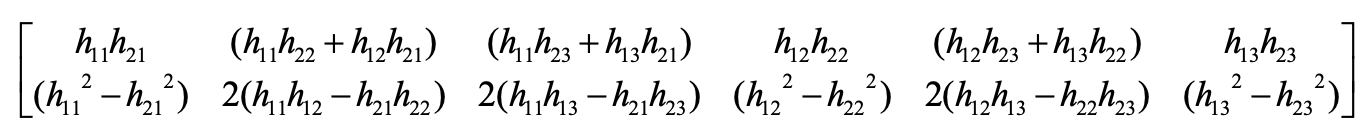

In [8]:
MergeMatirx = np.asarray([
[hap[0][0]*hap[1][0], (hap[0][0]*hap[1][1]+hap[0][1]*hap[1][0]), (hap[0][0]*hap[1][2]+hap[0][2]*hap[1][0]), hap[0][1]*hap[1][1], (hap[0][1]*hap[1][2]+hap[0][2]*hap[1][1]) , hap[0][2]*hap[1][2]],
[(hap[0][0]**2 - hap[1][0]**2), 2*(hap[0][0]*hap[0][1]-hap[1][0]*hap[1][1]), 2*(hap[0][0]*hap[0][2]-hap[1][0]*hap[1][2]), (hap[0][1]**2 - hap[1][1]**2), 2*(hap[0][1]*hap[0][2]-hap[1][1]*hap[1][2]) , (hap[0][2]**2-hap[1][2]**2)],
[hbp[0][0]*hbp[1][0], (hbp[0][0]*hbp[1][1]+hbp[0][1]*hbp[1][0]), (hbp[0][0]*hbp[1][2]+hbp[0][2]*hbp[1][0]), hbp[0][1]*hbp[1][1], (hbp[0][1]*hbp[1][2]+hbp[0][2]*hbp[1][1]) , hbp[0][2]*hbp[1][2]],
[(hbp[0][0]**2 - hbp[1][0]**2), 2*(hbp[0][0]*hbp[0][1]-hbp[1][0]*hbp[1][1]), 2*(hbp[0][0]*hbp[0][2]-hbp[1][0]*hbp[1][2]), (hbp[0][1]**2 - hbp[1][1]**2), 2*(hbp[0][1]*hbp[0][2]-hbp[1][1]*hbp[1][2]) , (hbp[0][2]**2-hbp[1][2]**2)],
[hcp[0][0]*hcp[1][0], (hcp[0][0]*hcp[1][1]+hcp[0][1]*hcp[1][0]), (hcp[0][0]*hcp[1][2]+hcp[0][2]*hcp[1][0]), hcp[0][1]*hcp[1][1], (hcp[0][1]*hcp[1][2]+hcp[0][2]*hcp[1][1]) , hcp[0][2]*hcp[1][2]],
[(hcp[0][0]**2 - hcp[1][0]**2), 2*(hcp[0][0]*hcp[0][1]-hcp[1][0]*hcp[1][1]), 2*(hcp[0][0]*hcp[0][2]-hcp[1][0]*hcp[1][2]), (hcp[0][1]**2 - hcp[1][1]**2), 2*(hcp[0][1]*hcp[0][2]-hcp[1][1]*hcp[1][2]) , (hcp[0][2]**2-hcp[1][2]**2)],
])

In [9]:
MergeMatirx

array([[ 2.45346030e+01,  7.86246873e+01,  6.66034466e-02,
        -1.20355728e+01,  8.62572105e-02,  4.38063760e-05],
       [ 5.44562374e+01, -8.18572514e+01,  1.12869350e-01,
        -1.04447926e+02, -1.21708593e-01,  5.59704772e-05],
       [ 1.17524332e+01,  3.89747745e+01,  1.11804150e-02,
        -1.61385624e+00, -2.56896876e-02, -1.17554641e-05],
       [ 2.08313798e+01, -3.76427645e+01, -4.97487368e-02,
        -5.95570520e+01, -5.48611603e-02, -2.82692289e-06],
       [-2.60795211e+01,  5.80125407e+00, -1.19299411e-02,
        -3.13639954e-01,  4.56724798e-04,  1.97271748e-05],
       [-9.76185397e+00,  4.14025320e+00, -9.99074767e-02,
        -3.43090001e-01,  1.18879612e-02, -3.02351778e-05]])

In [19]:
u,s,v = np.linalg.svd(MergeMatirx)
v = v.T
#v = np.around(v, decimals=4)
v = np.around(v, decimals=20)
w = np.asarray([
[v[0][5],v[1][5],v[2][5]],
[v[1][5],v[3][5],v[4][5]],
[v[2][5],v[4][5],v[5][5]],               
])
v, w

(array([[-3.09564231e-01,  5.02611748e-01,  8.07183094e-01,
         -2.61506830e-03, -1.77138402e-04, -9.33390384e-07],
        [ 6.62145346e-01,  7.23188581e-01, -1.96369677e-01,
          4.74966093e-05,  8.74407740e-04,  1.56103125e-08],
        [-3.84503060e-04,  9.63581283e-04,  2.49218542e-03,
          9.99996179e-01, -4.12689945e-04,  4.30267560e-04],
        [ 6.82446053e-01, -4.73686222e-01,  5.56676007e-01,
         -6.68358887e-04,  3.52139957e-04, -9.19189048e-07],
        [ 8.74296518e-04,  3.76128416e-04, -1.19690925e-04,
         -4.12547761e-04, -9.99999410e-01,  2.98683652e-04],
        [-2.32317515e-07,  5.04504660e-07, -2.31616036e-07,
          4.30145809e-04, -2.98861229e-04, -9.99999863e-01]]),
 array([[-9.33390384e-07,  1.56103125e-08,  4.30267560e-04],
        [ 1.56103125e-08, -9.19189048e-07,  2.98683652e-04],
        [ 4.30267560e-04,  2.98683652e-04, -9.99999863e-01]]))

In [20]:
inw = np.linalg.inv(w)*(10**6)
normalizeByValue = inw[2][2]
Old = inw
inw = (inw / normalizeByValue)
w, Old, inw, normalizeByValue

(array([[-9.33390384e-07,  1.56103125e-08,  4.30267560e-04],
        [ 1.56103125e-08, -9.19189048e-07,  2.98683652e-04],
        [ 4.30267560e-04,  2.98683652e-04, -9.99999863e-01]]),
 array([[-1.38267981e+12, -2.40100167e+11, -6.66636353e+08],
        [-2.40100167e+11, -1.24654552e+12, -4.75630146e+08],
        [-6.66636353e+08, -4.75630146e+08, -1.42889514e+06]]),
 array([[9.67656594e+05, 1.68032041e+05, 4.66539729e+02],
        [1.68032041e+05, 8.72384180e+05, 3.32865675e+02],
        [4.66539729e+02, 3.32865675e+02, 1.00000000e+00]]),
 -1428895.1419239203)

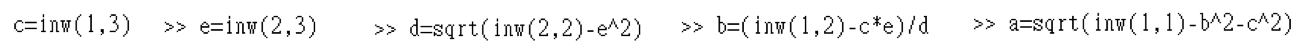

In [21]:
import math

c = inw[0][2]
e = inw[1][2]
d = math.sqrt(abs(inw[1][1] - e**2))
b = (inw[0][1] - c*e)/d
a = math.sqrt(abs(inw[0][0]-b**2-c**2))
c, e, d, b, a, inw[2][2]

K = [
[a,b,c],
[0,d,e],     
[0,0,inw[2][2]]
]
K

[[865.9008360500217, 14.595109528969811, 466.53972934028315],
 [0, 872.6881588889776, 332.86567503834976],
 [0, 0, 1.0]]

In [22]:
#K = np.asarray(K)
K

[[865.9008360500217, 14.595109528969811, 466.53972934028315],
 [0, 872.6881588889776, 332.86567503834976],
 [0, 0, 1.0]]

# Ref Answer: 
K matrix  
892.613403, 0.000000, 518.500000  
0.000000, 892.613403, 349.000000  
0.000000, 0.000000, 1.000000  

RT matrix  
-0.346738 0.936377 -0.054507 -15.420745  
0.447104 0.113917 -0.887199 4.205203  
-0.824543 -0.331996 -0.458157 142.994766  

In [14]:
##[[563.4242934615204, -1.7184354899092307, -1.6623636595267735],
## [0, 1025.7976981585111, 1.072756705192486],
## [0, 0, 1]]